<a href="https://colab.research.google.com/github/TMhdSofyan/Convergence_Analysis/blob/main/Polynomial_Chaos_Expansion_DegreeTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [122]:
import numpy as np
import pandas as pd

In [123]:
df = pd.read_csv('/content/drive/MyDrive/THESIS/Data/Experimental_Design2.csv')
df.tail()

,ID,Generator,Status,Result Status,Proxy Role,Keep SR3,Has SR3,Rating,CCPOR,KRG,...,PERMK_MULTI,POR_MULTI,SORW,Cum_Oil,Cum_Gas,Execution Node,Dataset Path,Optimal,MCMC Count,Comment
17072,17072,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.531235,...,1.159760,0.997680,0.100961,1643914.0,317224130.0,77-1134-41,SA.cmsd\SA_17072.dat,False,0,NaN
17073,17073,User,Complete,NormalTermination,Training,Auto,False,0,0.000004,0.499895,...,0.870061,1.156218,0.108906,1661441.1,330066270.0,77-1134-41,SA.cmsd\SA_17073.dat,False,0,NaN
17074,17074,User,Complete,NormalTermination,Training,Auto,False,0,0.000004,0.509262,...,0.960209,0.982429,0.100172,1584137.9,315742180.0,77-1134-41,SA.cmsd\SA_17074.dat,False,0,NaN
17075,17075,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.504134,...,1.041308,1.062378,0.090308,1632599.6,327702820.0,77-1134-41,SA.cmsd\SA_17075.dat,False,0,NaN
17076,17076,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.431177,...,1.219194,1.158148,0.097388,1668201.6,328796160.0,77-1134-41,SA.cmsd\SA_17076.dat,False,0,NaN


In [124]:
df.columns

Index(['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'CCPOR', 'KRG', 'KRO', 'KRW', 'NG', 'NW',
       'PERMI_MULTI', 'PERMK_MULTI', 'POR_MULTI', 'SORW', 'Cum_Oil', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [5]:
!pip3 install UQpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.7/294.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 kB 22.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=133b8d66466c85d2b005cb465d4fe37ab8f003fbd5735cac812b39a2890680b6
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [6]:
df.columns

Index(['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'CCPOR', 'KRG', 'KRO', 'KRW', 'NG', 'NW',
       'PERMI_MULTI', 'PERMK_MULTI', 'POR_MULTI', 'SORW', 'Cum_Oil', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [125]:
df2 = df.drop(columns = ['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating','KRG', 'KRO', 'KRW', 'NG', 'NW','PERMK_MULTI', 'SORW', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'])
df2.tail()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil
17072,0.000005,1.002530,0.997680,1643914.0
17073,0.000004,1.020072,1.156218,1661441.1
17074,0.000004,0.787814,0.982429,1584137.9
17075,0.000005,0.881290,1.062378,1632599.6
17076,0.000005,1.074085,1.158148,1668201.6


_________

#**Degree 3**

In [126]:
first_1000 = df2.head(1500)
X = first_1000.drop(columns="Cum_Oil").to_numpy()
y = first_1000.Cum_Oil.to_numpy()

In [127]:
X.shape

(1500, 3)

In [128]:
y

array([1641502. , 1658139.5, 1638181.8, ..., 1634920.8, 1623799.1,
       1639106.3])

In [129]:
from UQpy.distributions import Uniform, Normal, JointIndependent
from UQpy.surrogates import *

In [130]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [131]:
# Define the maximum degree for the polynomial basis
max_degree = 3

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [132]:
moments=pce.get_moments()
moments

(1633904.6118765527, 586127936.7487632)

In [133]:
# Optionally, print the PCE coefficients or any other relevant information
print("PCE Coefficients:")
print(pce.coefficients)

PCE Coefficients:
[[ 1.63390461e+06]
 [ 3.51741831e+03]
 [ 1.48471004e+04]
 [ 1.71714897e+04]
 [-4.19773919e+03]
 [ 5.46051034e+01]
 [-5.75038859e+03]
 [-6.70224278e+02]
 [-5.23381936e+02]
 [-3.07349002e+02]
 [-6.72171274e+01]
 [ 5.64102687e+01]
 [-5.69733333e+02]
 [ 2.55654892e+03]
 [-6.89519280e+01]
 [-1.00557474e+01]
 [ 2.57430156e+02]
 [ 9.81659205e+01]
 [ 8.90622260e+00]
 [ 4.01965833e+01]]


In [134]:
Test_Data = df2.copy()
X_test = Test_Data.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [135]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data['Cum_Oil_PCE'] = y_test

Test_Data.head()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641156e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657032e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637611e+06
3,0.000003,1.085006,0.985052,1637746.9,1.637949e+06
4,0.000005,0.893916,1.116380,1642039.0,1.643005e+06


In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data)

# Predict on training and test sets
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0005753555470802526


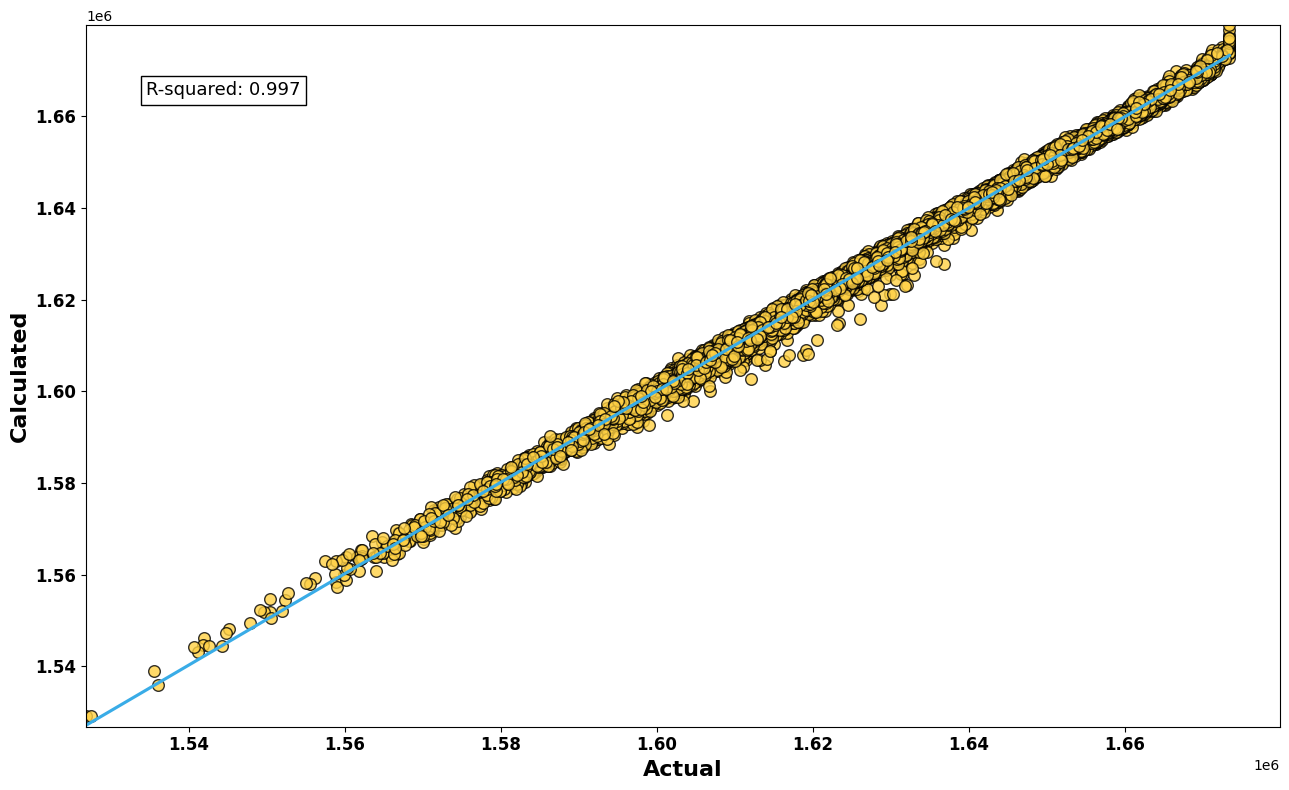

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Degree3.png', dpi=600)
plt.show()

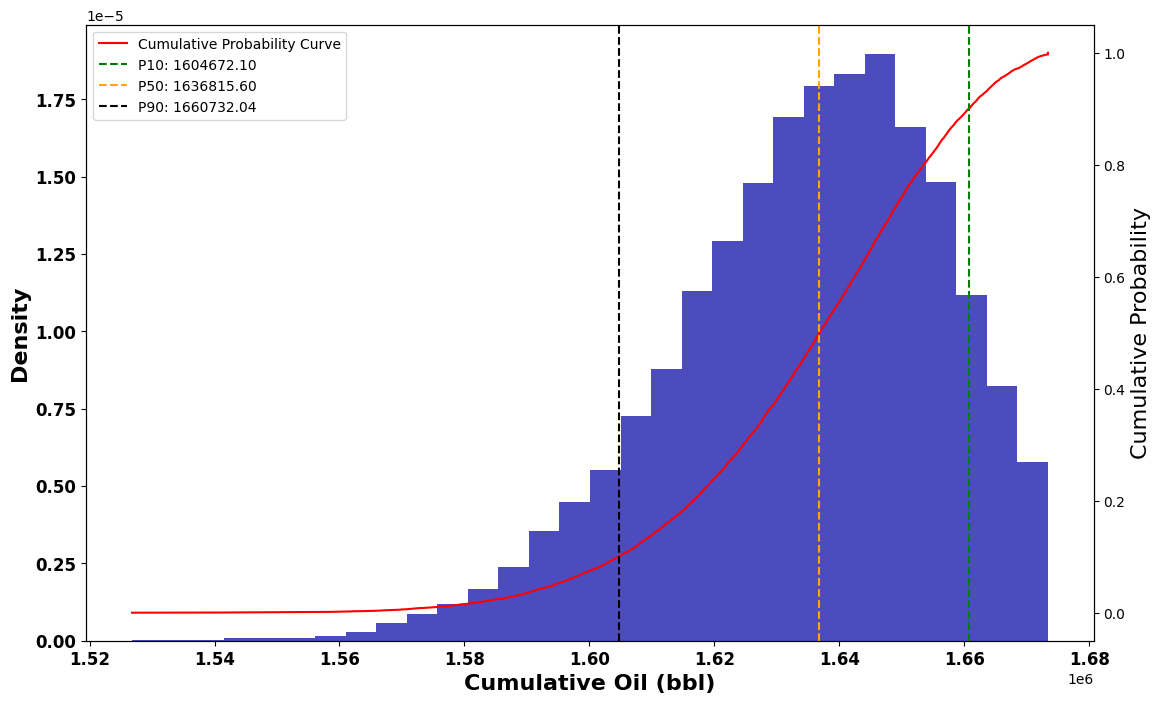

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))
plt.hist(Test_Data['Cum_Oil'], bins=30, alpha=0.7, color='#0000a5', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Cumulative probability curve
sorted_cum_oil = np.sort(df['Cum_Oil'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(df['Cum_Oil'], 10)
p50 = np.percentile(df['Cum_Oil'], 50)
p10 = np.percentile(df['Cum_Oil'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Cumulative.png', dpi=600)
plt.show()

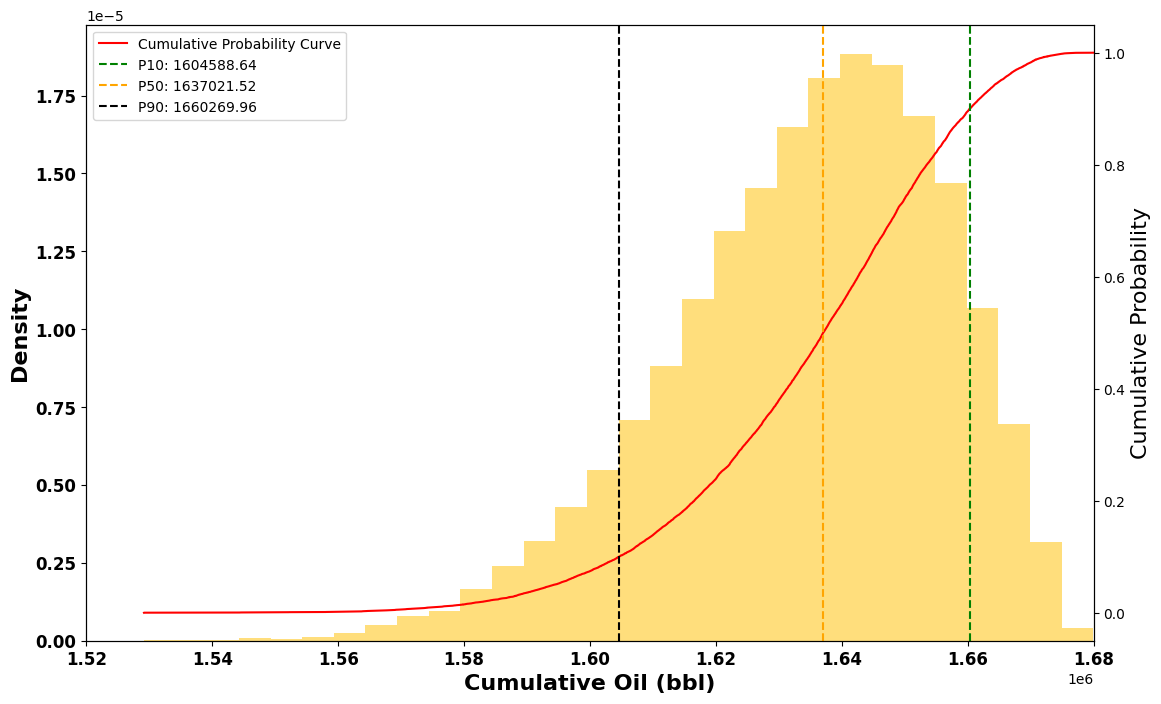

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_PCE_Degree3.png', dpi=600)
plt.show()

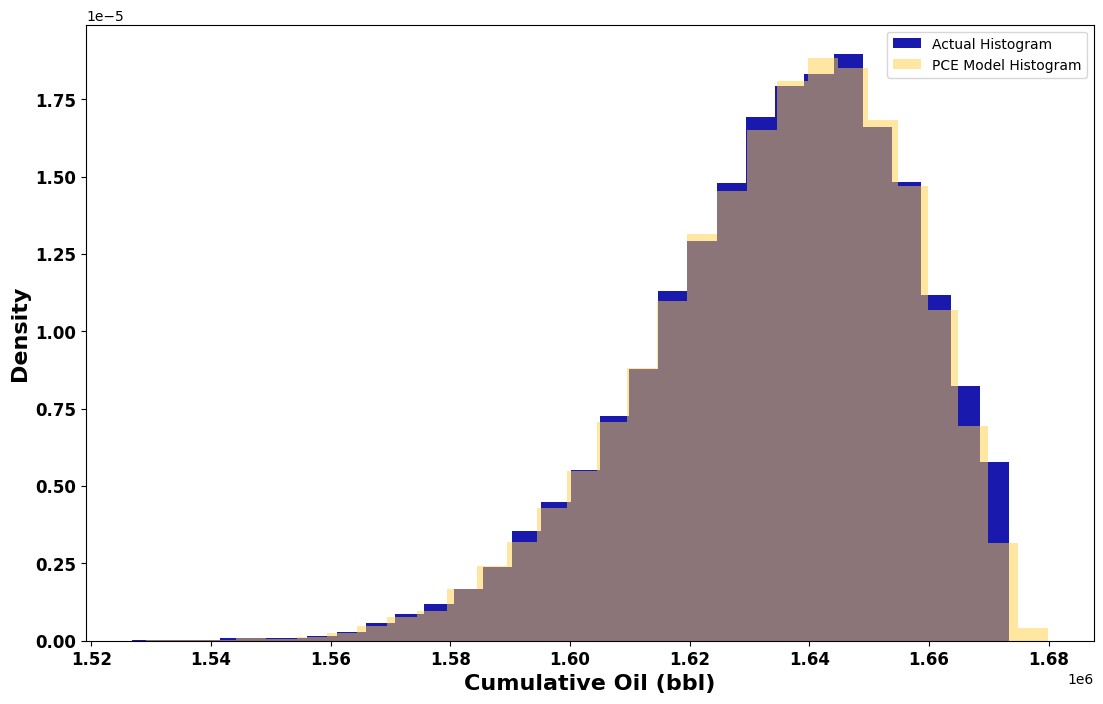

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Histogram_Degree3.png', dpi=600)
plt.show()

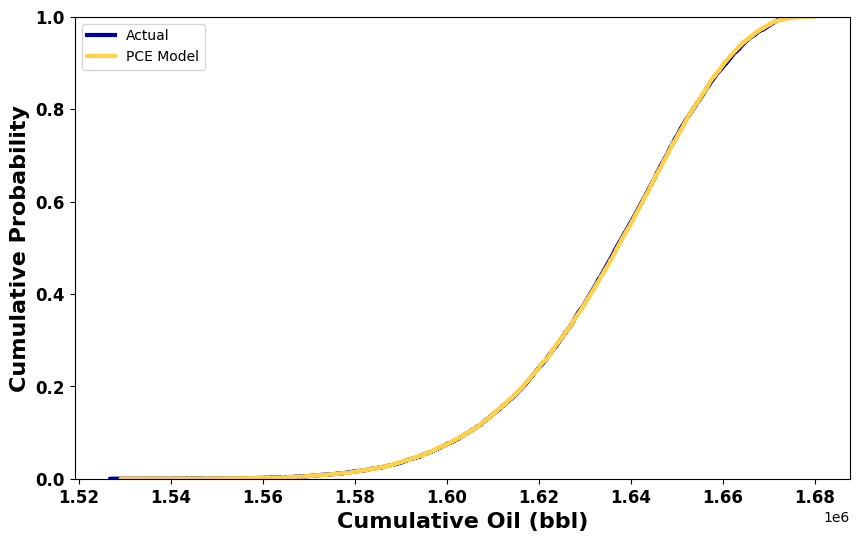

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Create the cumulative distribution plot
plt.figure(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Degree3.png', dpi=600)
plt.show()

___________

#**DEGREE 5**

In [146]:
first_1000_2 = df2.head(1500)
X = first_1000_2.drop(columns="Cum_Oil").to_numpy()
y = first_1000_2.Cum_Oil.to_numpy()

In [147]:
X.shape

(1500, 3)

In [148]:
y

array([1641502. , 1658139.5, 1638181.8, ..., 1634920.8, 1623799.1,
       1639106.3])

In [149]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [150]:
# Define the maximum degree for the polynomial basis
max_degree = 5

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [151]:
moments=pce.get_moments()
moments

(1633929.7558397064, 588564939.9508998)

In [152]:
# Optionally, print the PCE coefficients or any other relevant information
print("PCE Coefficients:")
print(pce.coefficients)

PCE Coefficients:
[[ 1.63392976e+06]
 [ 3.43275570e+03]
 [ 1.44829209e+04]
 [ 1.75198400e+04]
 [-3.96653306e+03]
 [-7.17476674e+02]
 [-5.73758541e+03]
 [-7.57020351e+02]
 [-5.06312573e+02]
 [-2.85886260e+02]
 [ 2.98062473e+02]
 [-8.67492520e+02]
 [ 3.91553280e+02]
 [ 1.95096640e+03]
 [-1.45473646e+02]
 [-9.48181488e+01]
 [ 1.98080746e+02]
 [ 1.54387177e+02]
 [ 7.80897077e+01]
 [-1.37345968e+02]
 [ 1.18324090e+02]
 [-8.88534095e+02]
 [ 8.26262874e+02]
 [-1.12599231e+03]
 [-2.13985137e+02]
 [-1.80172504e+00]
 [-1.64236065e+02]
 [-9.30581543e+01]
 [-2.05038098e+02]
 [-6.22704466e+01]
 [-6.66952976e+01]
 [ 4.75363991e+01]
 [ 3.38736499e+01]
 [-4.19600718e+00]
 [-7.54633489e+00]
 [ 1.23710912e+02]
 [-4.84824767e+02]
 [ 2.97820669e+02]
 [-7.58575210e+02]
 [ 1.04390923e+03]
 [-3.15472962e+02]
 [-7.20835667e+01]
 [-1.06778271e+02]
 [ 8.45670169e+01]
 [-2.89593059e+01]
 [-3.64019473e+01]
 [ 6.27588148e+01]
 [-2.48083119e+01]
 [-2.36621269e+01]
 [-5.50300011e+00]
 [ 5.52410169e+01]
 [ 2.06673860

In [153]:
Test_Data2 = df2.copy()
X_test = Test_Data2.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [154]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data2['Cum_Oil_PCE'] = y_test

Test_Data2.head()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641336e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657493e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637572e+06
3,0.000003,1.085006,0.985052,1637746.9,1.637770e+06
4,0.000005,0.893916,1.116380,1642039.0,1.641773e+06


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data2)

# Predict on training and test sets
y_test = Test_Data2['Cum_Oil']
y_test_PCE = Test_Data2['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.00044675263963726944


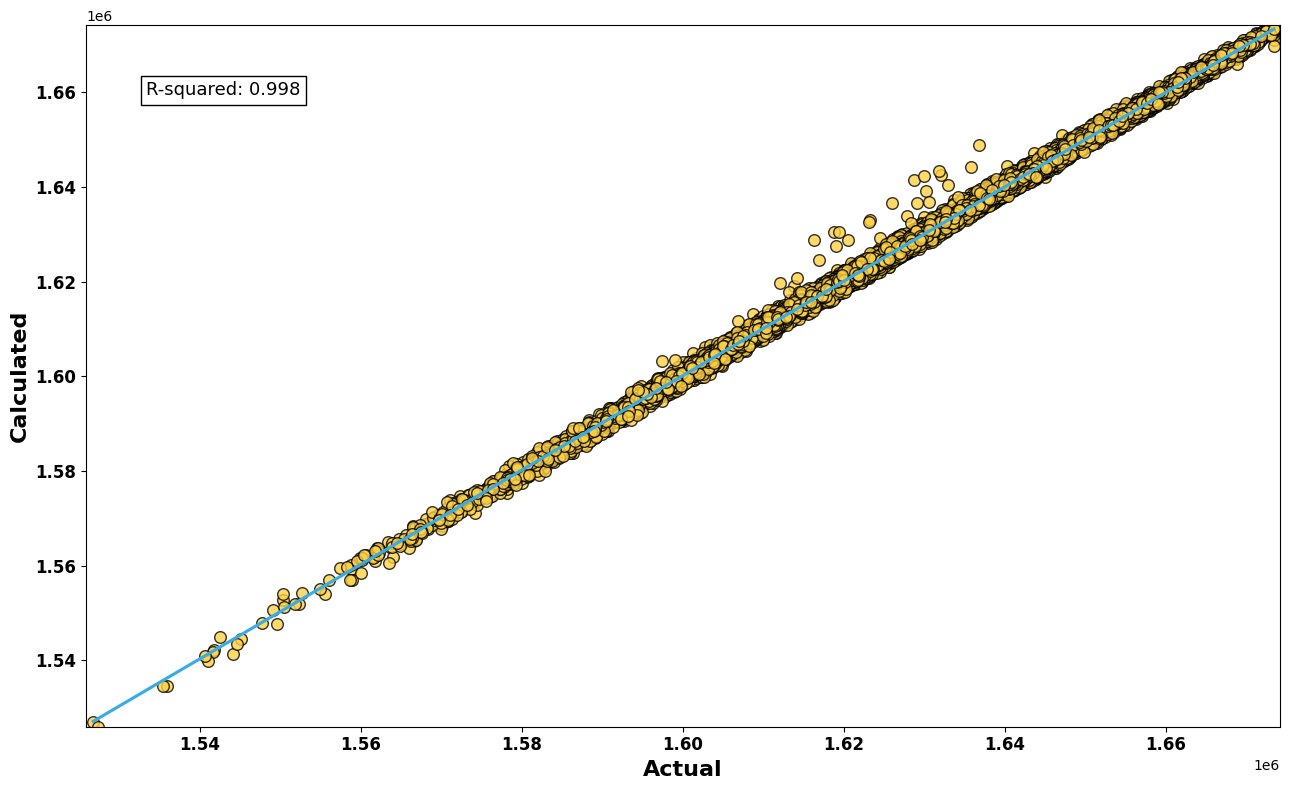

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data2['Cum_Oil']
y_test_PCE = Test_Data2['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Degree5.png', dpi=600)
plt.show()

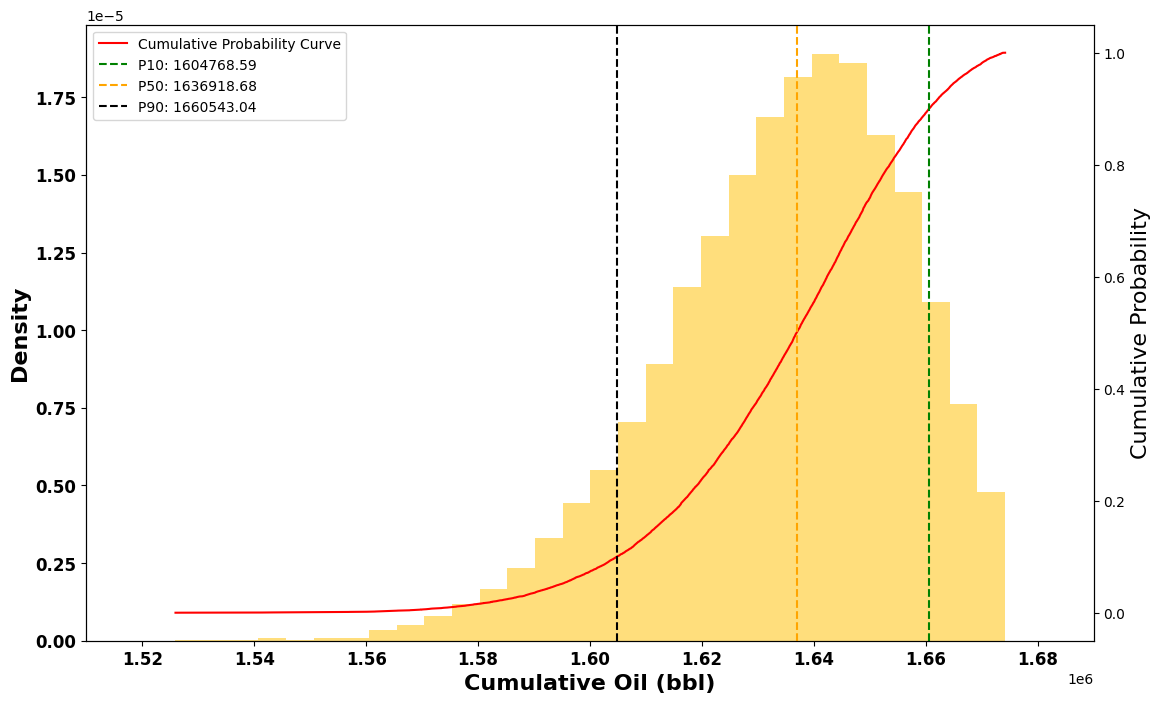

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.51e6
x_max = 1.69e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data2['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data2['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data2['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data2['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data2['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_PCE_Degree5.png', dpi=600)
plt.show()

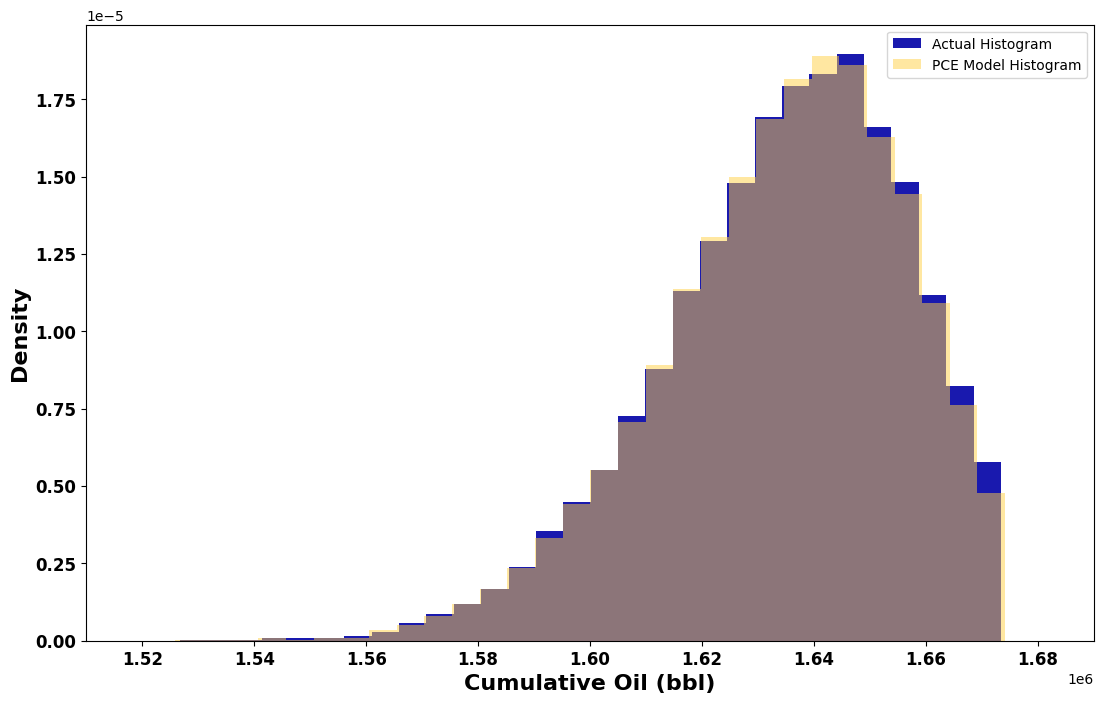

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.51e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data2['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data2['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Histogram_Degree5.png', dpi=600)
plt.show()

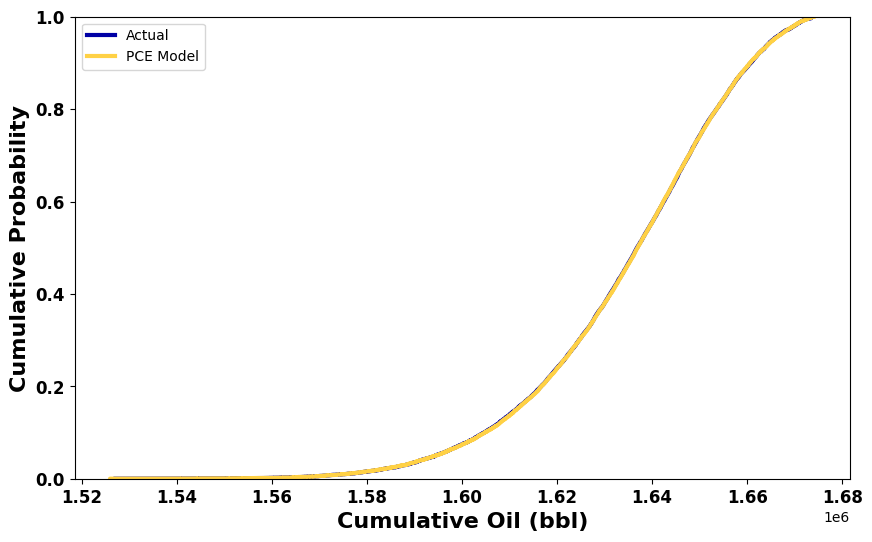

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Create the cumulative distribution plot
plt.figure(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data2, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data2, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Degree5.png', dpi=600)
plt.show()

________

#**DEGREE 7**

In [161]:
first_1000_3 = df2.head(1500)
X = first_1000_3.drop(columns="Cum_Oil").to_numpy()
y = first_1000_3.Cum_Oil.to_numpy()

In [162]:
X.shape

(1500, 3)

In [163]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)


In [164]:
# Define the maximum degree for the polynomial basis
max_degree = 7

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [165]:
moments=pce.get_moments()
moments

(1633845.7692822828, 658519118.4014102)

In [166]:
Test_Data3 = df2.copy()
X_test = Test_Data3.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [167]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data3['Cum_Oil_PCE'] = y_test

Test_Data3.head()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641419e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657776e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637577e+06
3,0.000003,1.085006,0.985052,1637746.9,1.637898e+06
4,0.000005,0.893916,1.116380,1642039.0,1.641877e+06


In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data3)

# Predict on training and test sets
y_test = Test_Data3['Cum_Oil']
y_test_PCE = Test_Data3['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.00042931616750201026


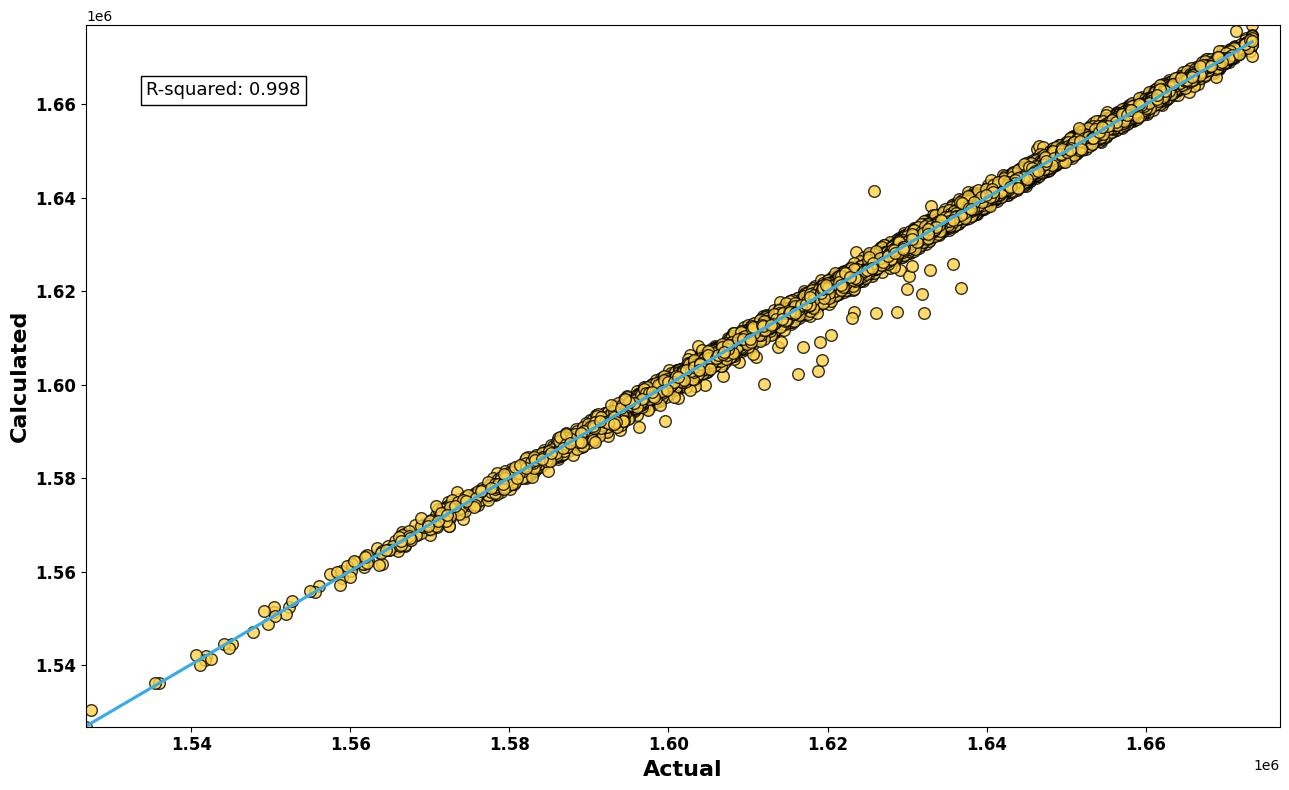

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data3['Cum_Oil']
y_test_PCE = Test_Data3['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Degree7.png', dpi=600)
plt.show()

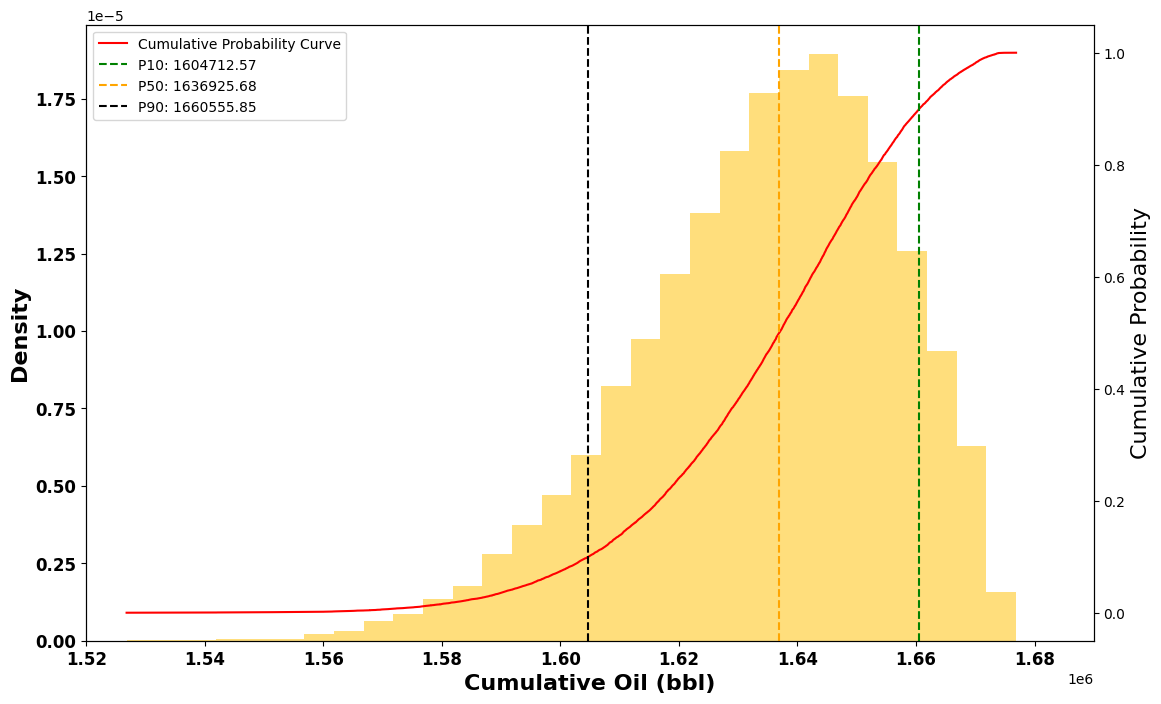

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data3['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data3['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data3['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data3['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data3['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_PCE_Degree7.png', dpi=600)
plt.show()

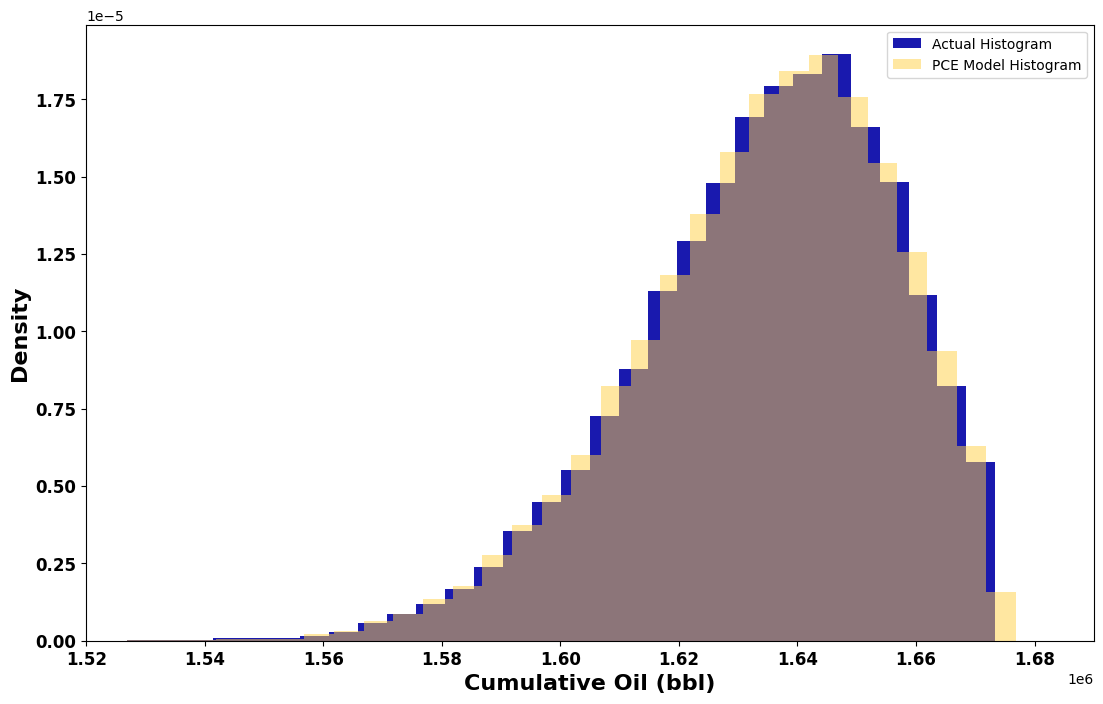

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data3['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data3['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Histogram_Degree7.png', dpi=600)
plt.show()

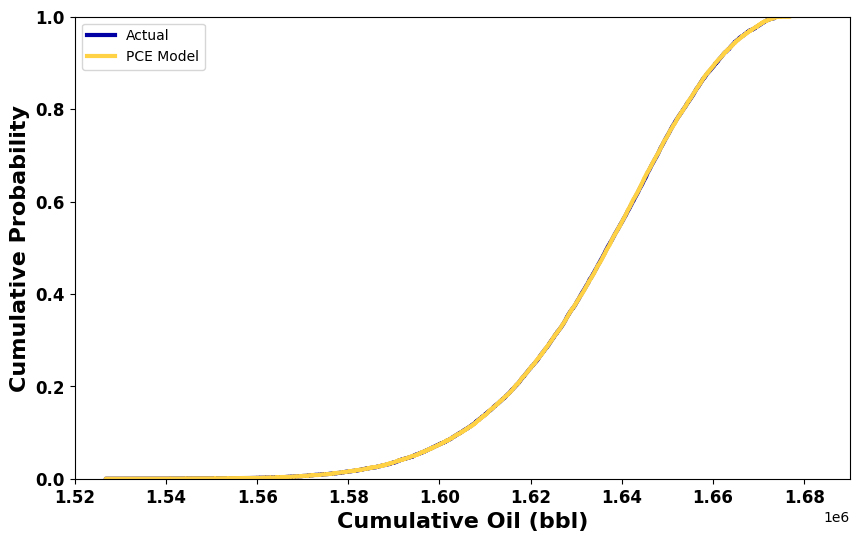

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data3, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data3, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Degree7.png', dpi=600)
plt.show()

#**DEGREE 9**

In [174]:
first_1000_4 = df2.head(1500)
X = first_1000_4.drop(columns="Cum_Oil").to_numpy()
y = first_1000_4.Cum_Oil.to_numpy()

In [175]:
X.shape

(1500, 3)

In [176]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [177]:
# Define the maximum degree for the polynomial basis
max_degree = 9

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [178]:
moments=pce.get_moments()
moments

(1634354.0733182535, 11924753914.553513)

In [179]:
Test_Data4 = df2.copy()
X_test = Test_Data4.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [180]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data4['Cum_Oil_PCE'] = y_test

Test_Data4.tail()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
17072,0.000005,1.002530,0.997680,1643914.0,1.642162e+06
17073,0.000004,1.020072,1.156218,1661441.1,1.661722e+06
17074,0.000004,0.787814,0.982429,1584137.9,1.584469e+06
17075,0.000005,0.881290,1.062378,1632599.6,1.632086e+06
17076,0.000005,1.074085,1.158148,1668201.6,1.668279e+06


In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data4)

# Predict on training and test sets
y_test = Test_Data4['Cum_Oil']
y_test_PCE = Test_Data4['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.00051764134293908


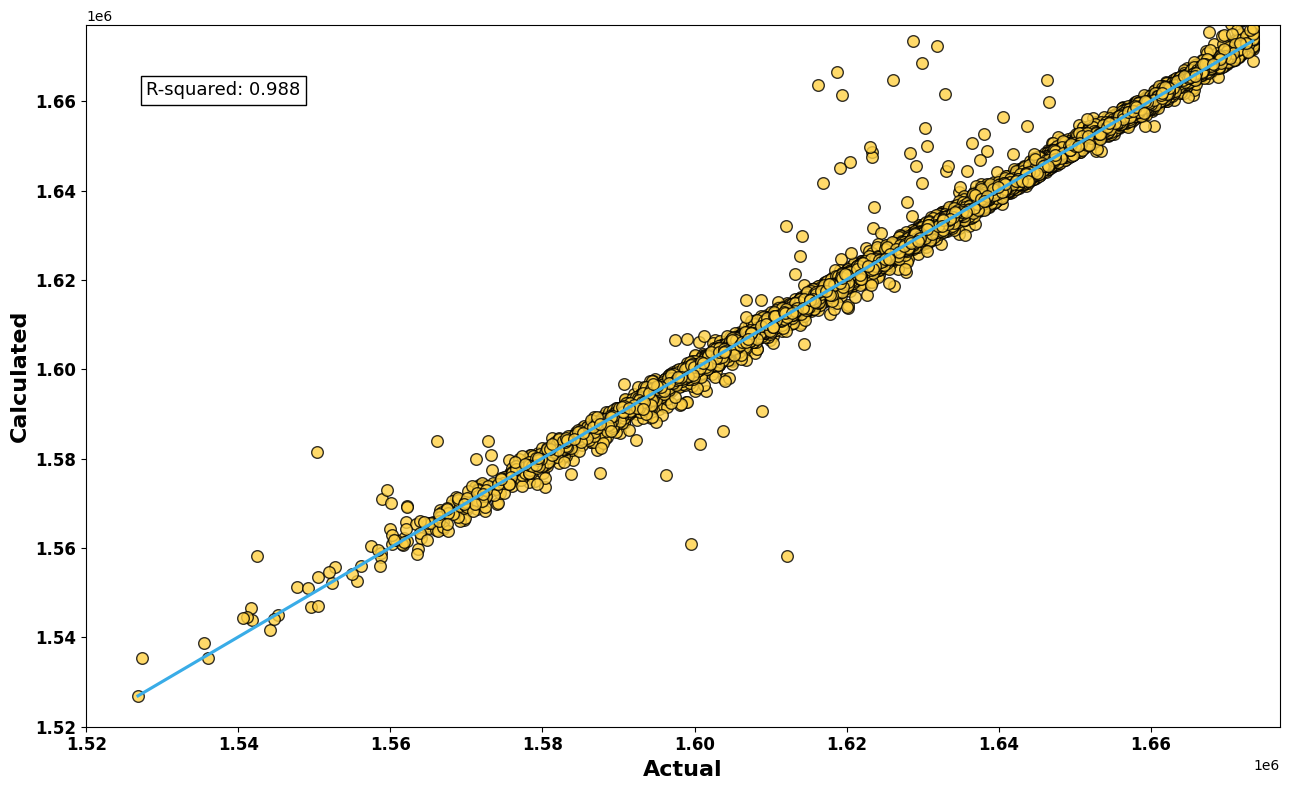

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data4['Cum_Oil']
y_test_PCE = Test_Data4['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.677e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Degree9.png', dpi=600)
plt.show()

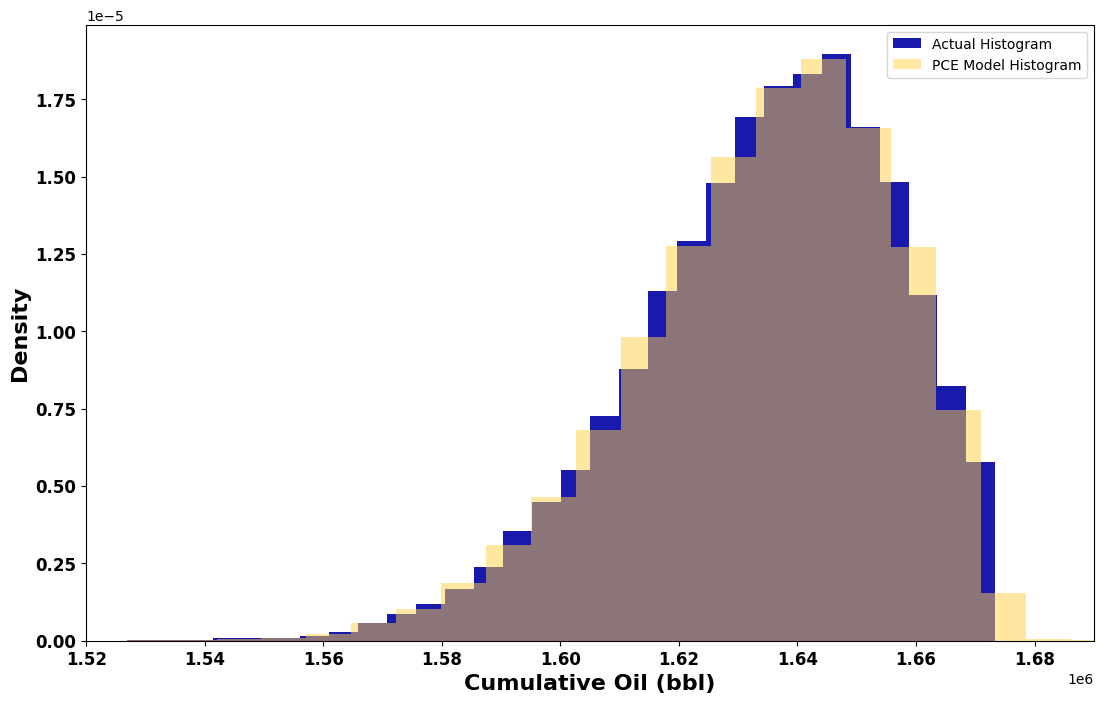

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data4['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data4['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Histogram_Degree9.png', dpi=600)
plt.show()

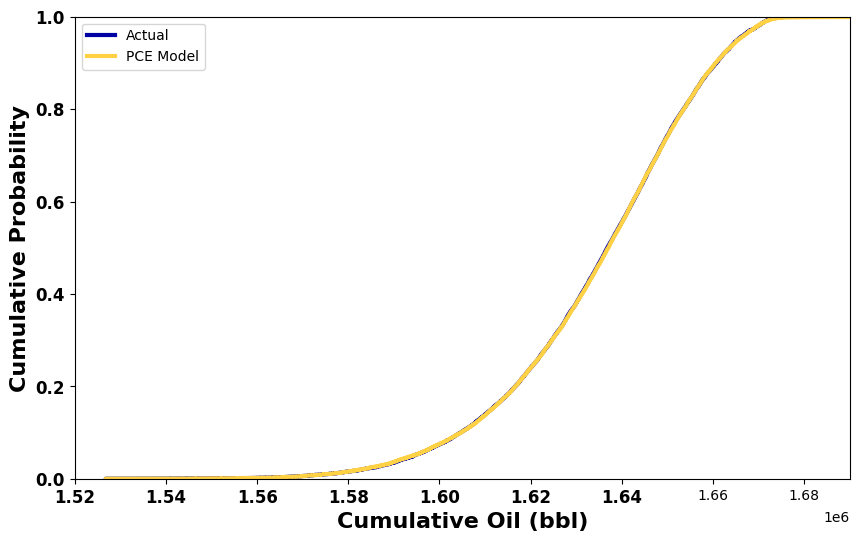

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data4, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data4, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Degree9.png', dpi=600)
plt.show()

#**DEGREE 11**

In [244]:
first_1000_5 = df2.head(1500)
X = first_1000_5.drop(columns="Cum_Oil").to_numpy()
y = first_1000_5.Cum_Oil.to_numpy()

In [245]:
X.shape

(1500, 3)

In [246]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [247]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [248]:
moments=pce.get_moments()
moments

(1627160.9954548366, 2050790924807.5784)

In [249]:
Test_Data5 = df2.copy()
X_test = Test_Data5.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [250]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data5['Cum_Oil_PCE'] = y_test

Test_Data5.head()


,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641586e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657852e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637293e+06
3,0.000003,1.085006,0.985052,1637746.9,1.638301e+06
4,0.000005,0.893916,1.116380,1642039.0,1.642237e+06


In [251]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data5)

# Predict on training and test sets
y_test = Test_Data5['Cum_Oil']
y_test_PCE = Test_Data5['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0009256129669781801


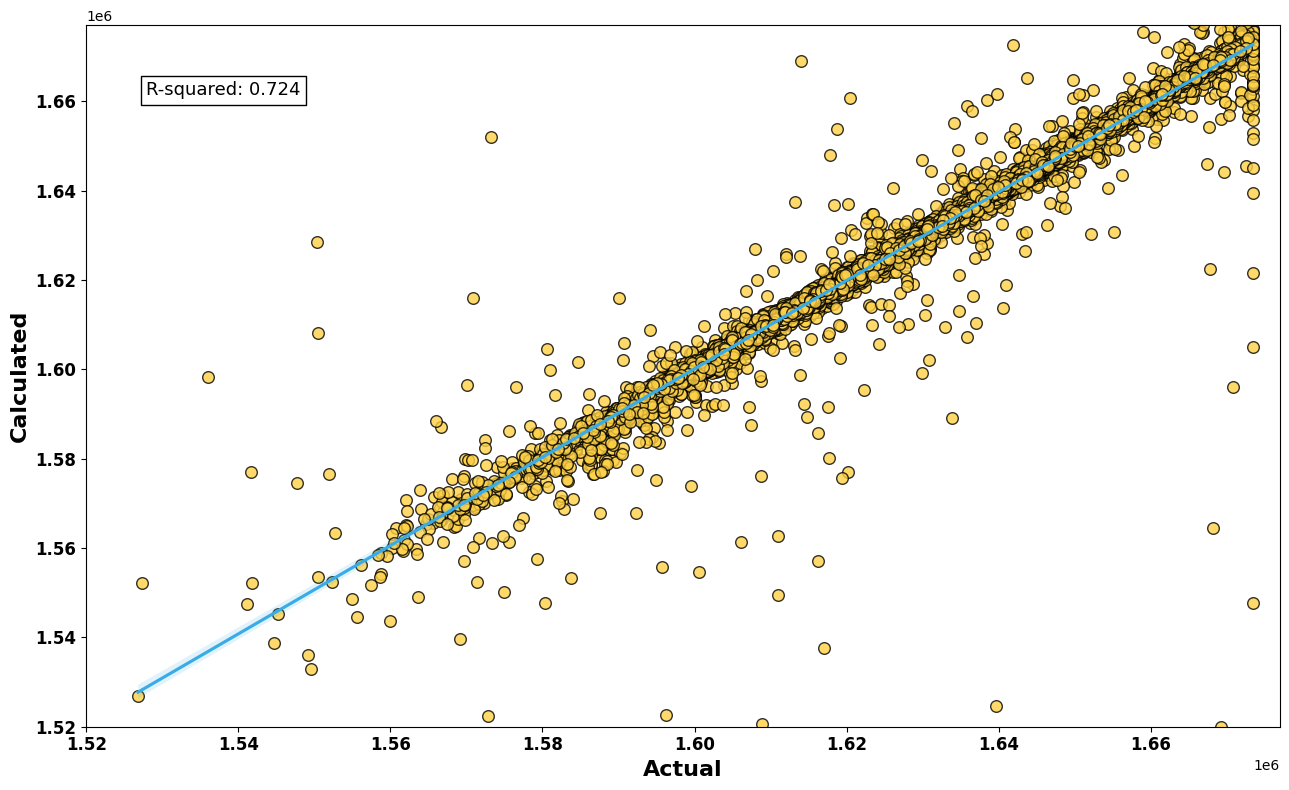

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data5['Cum_Oil']
y_test_PCE = Test_Data5['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.677e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Degree11.png', dpi=600)
plt.show()

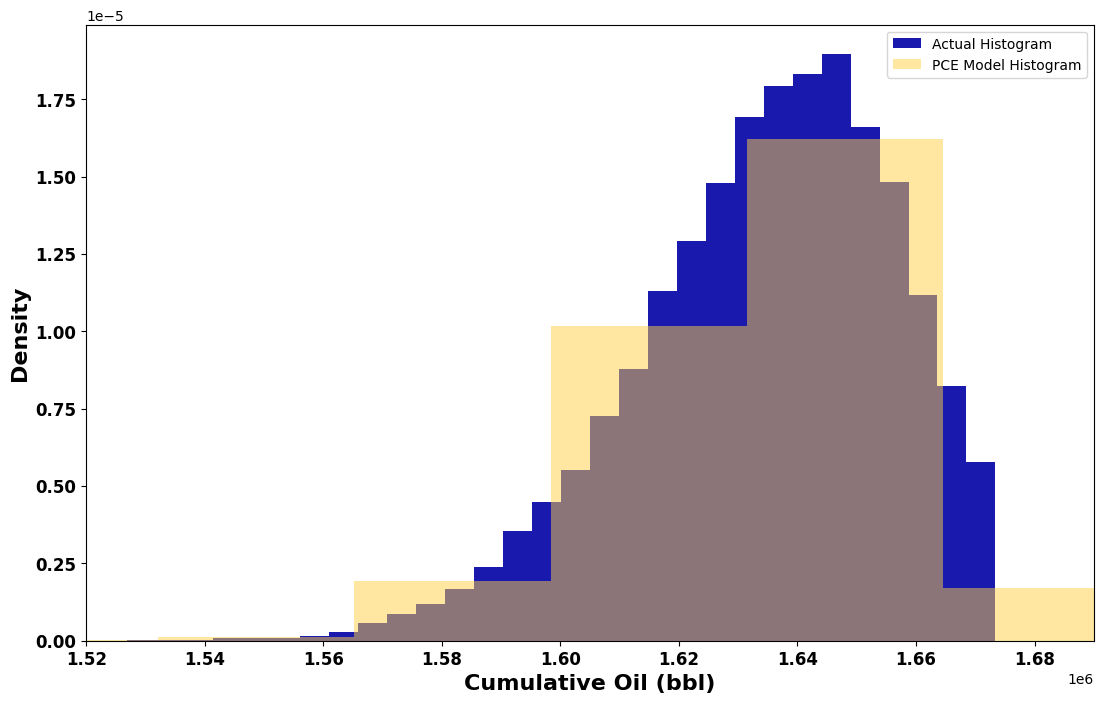

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data5['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data5['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Histogram_Degree11.png', dpi=600)
plt.show()

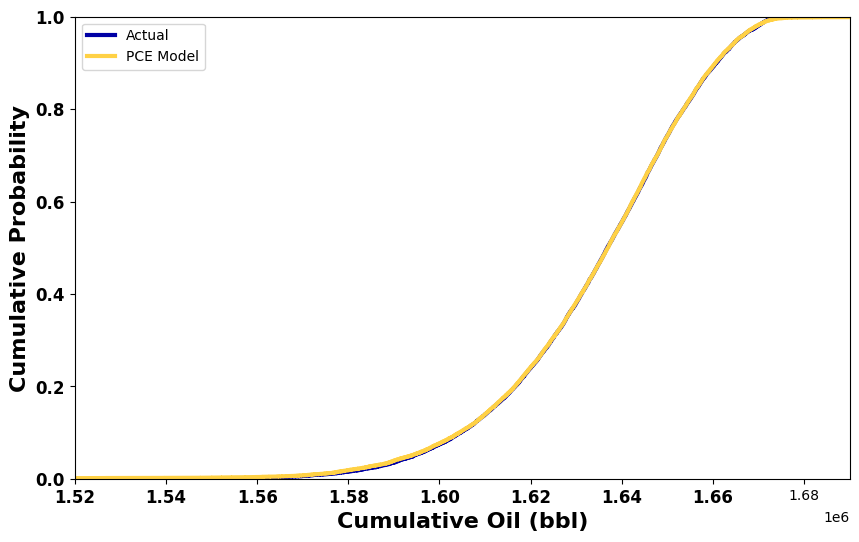

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data5, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data5, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Degree11.png', dpi=600)
plt.show()

______

_________

#**Combine Plot**

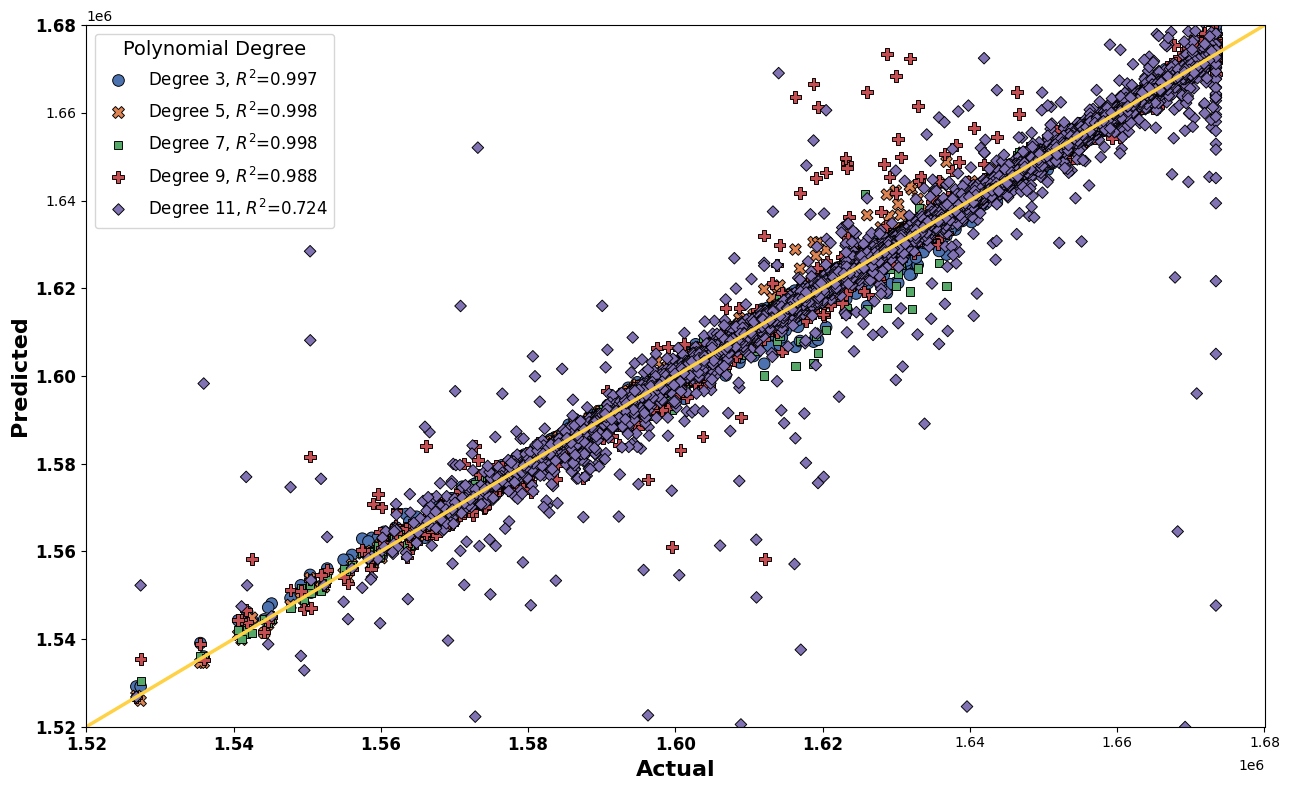

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

# Extract the actual and predicted values for each test set
y_test1 = Test_Data['Cum_Oil']
y_test_PCE1 = Test_Data['Cum_Oil_PCE']
y_test2 = Test_Data2['Cum_Oil']
y_test_PCE2 = Test_Data2['Cum_Oil_PCE']
y_test3 = Test_Data3['Cum_Oil']
y_test_PCE3 = Test_Data3['Cum_Oil_PCE']
y_test4 = Test_Data4['Cum_Oil']
y_test_PCE4 = Test_Data4['Cum_Oil_PCE']
y_test5 = Test_Data5['Cum_Oil']
y_test_PCE5 = Test_Data5['Cum_Oil_PCE']

# Calculate R-squared values
r2_1 = r2_score(y_test1, y_test_PCE1)
r2_2 = r2_score(y_test2, y_test_PCE2)
r2_3 = r2_score(y_test3, y_test_PCE3)
r2_4 = r2_score(y_test4, y_test_PCE4)
r2_5 = r2_score(y_test5, y_test_PCE5)

# Create a DataFrame for the combined plot
combined_data = pd.DataFrame({
    'Actual': pd.concat([y_test1, y_test2, y_test3, y_test4, y_test5]),
    'Predicted': pd.concat([y_test_PCE1, y_test_PCE2, y_test_PCE3, y_test_PCE4, y_test_PCE5]),
    'Degree': (['Degree 3'] * len(y_test1) + ['Degree 5'] * len(y_test2) +
               ['Degree 7'] * len(y_test3) + ['Degree 9'] * len(y_test4) +
               ['Degree 11'] * len(y_test5))
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Plot settings
fig, ax = plt.subplots(figsize=(13, 8))
sns.scatterplot(x='Actual', y='Predicted', hue='Degree', style='Degree',
                data=combined_data, s=70, palette='deep', edgecolor='black', ax=ax)

# Draw a diagonal line
min_val = min(combined_data['Actual'].min(), combined_data['Predicted'].min())
max_val = max(combined_data['Actual'].max(), combined_data['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='#ffd145', linewidth=2.5)

# Set axis limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add labels and title
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Predicted', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Polynomial Degree', fontsize=12, title_fontsize=14)

# Add R-squared values to the legend
handles, labels = ax.get_legend_handles_labels()
r2_labels = [f'Degree 3, $R^2$={r2_1:.3f}',
             f'Degree 5, $R^2$={r2_2:.3f}',
             f'Degree 7, $R^2$={r2_3:.3f}',
             f'Degree 9, $R^2$={r2_4:.3f}',
             f'Degree 11, $R^2$={r2_5:.3f}']
plt.legend(handles, r2_labels, title='Polynomial Degree', fontsize=12, title_fontsize=14)

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Crossplot.png', dpi=600)
plt.show()

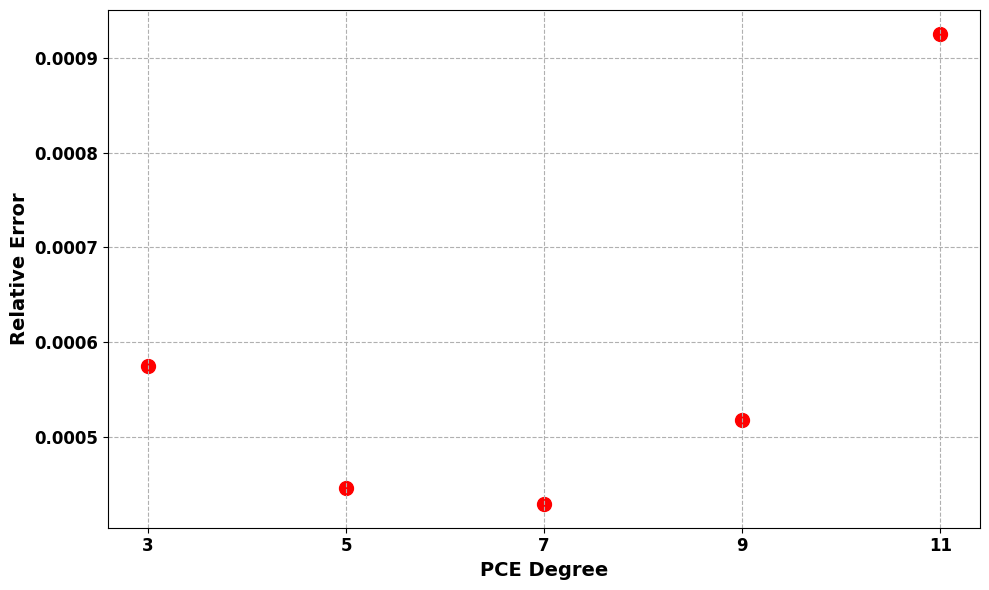

In [277]:
import matplotlib.pyplot as plt

# Data
degrees = [3, 5, 7, 9, 11]
relative_errors = [0.00057535, 0.00044675, 0.00042931, 0.00051764, 0.00092561]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(degrees, relative_errors, color='red', s=100)  # s is the size of the markers

# Formatting
plt.xlabel('PCE Degree', fontweight='bold', fontsize=16)
plt.ylabel('Relative Error', fontweight='bold', fontsize=16)
plt.xticks(degrees, fontsize=12, fontweight='bold')  # Set x-tick labels to degrees
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, which="both", ls="--")

# Remove scientific notation from y-axis
plt.ticklabel_format(style='plain', axis='y')

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/Relative_Error_Plot.png', dpi=300)
plt.show()